# Proyección Monetaria 2021

## 1. Carga de Librerías base

In [1]:
# Librerias base
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline

plt.style.use('ggplot')

# Se importa la libreria de Investing:
import investpy as inpy

from statsmodels.tsa.seasonal import seasonal_decompose

Investing tiene una base de datos Currency Change muy basta y servirá para importar los datos del último año para realizar proyecciones para el año 2021

## 2. Carga de CSV's

Importamos la base de datos VES - USD de fuente @enparalelovzla en su cuenta de INSTRAGRAM. Dicha data se encuentra en un archivo de formato csv, hemos de transformar dicha data en DataFrame para poder operar sobre ella.

### 2.1 VES - USD (BCV)
En primer lugar valores del tipo de cambio historico con el Banco Central de Venezuela BCV

In [2]:
# Directorio del fichero
url = 'https://raw.githubusercontent.com/Chrissroman/analisis_monetario_ves_usd/A1/ves_usd.csv'

In [3]:
# Lectura
ves_usd = pd.read_csv(url, delimiter = ',', decimal='.')

In [4]:
ves_usd.head()

Fecha  BCV  Monitor   Max   Min
0  1/1/2018  NaN     1.10  1.20  0.94
1  1/2/2018  NaN     1.13  1.26  0.98
2  1/3/2018  NaN     1.11  1.23  0.99
3  1/4/2018  NaN     1.17  1.28  0.99
4  1/5/2018  NaN     1.22  1.37  0.99

In [5]:
# Transformación de campo en un formato DateTime of DataFrame
ves_usd['Fecha'] = pd.to_datetime(ves_usd['Fecha'])
ves_usd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Fecha    1297 non-null   datetime64[ns]
 1   BCV      932 non-null    float64       
 2   Monitor  1297 non-null   float64       
 3   Max      1297 non-null   float64       
 4   Min      1297 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 50.8 KB


In [6]:
# Visualización General
ves_usd.head()

Fecha  BCV  Monitor   Max   Min
0 2018-01-01  NaN     1.10  1.20  0.94
1 2018-01-02  NaN     1.13  1.26  0.98
2 2018-01-03  NaN     1.11  1.23  0.99
3 2018-01-04  NaN     1.17  1.28  0.99
4 2018-01-05  NaN     1.22  1.37  0.99

## 3. Nuevas Variables

**Variable DELTA**

Se crea un campo donde se aprecien los diferenciales de cambio lo que permite entender el comportamientos estacionales y los ritmos de crecimiento y decrecimiento del tipo de cambio.

In [7]:
# Creación de Deltas para BCV y Monitor
col = ['BCV', 'Monitor']
for col in col:

  delta = []
  for i in range(0, ves_usd.shape[0]):
    if i == 0:
      delta.append(np.nan)
    else:
      value = ((ves_usd[col][i] - ves_usd[col][i-1])/ves_usd[col][i]) * 100 
      delta.append(value)

  str = 'Delta ' + col
  ves_usd[str] = delta

In [8]:
# Se fija como indice la Fecha y se elimina el campo sobrante
ves_usd.index = ves_usd['Fecha']
ves_usd.sort_index()
ves_usd.drop(['Fecha'], axis = 1, inplace = True)
ves_usd.head()

BCV  Monitor   Max   Min  Delta BCV  Delta Monitor
Fecha                                                         
2018-01-01  NaN     1.10  1.20  0.94        NaN            NaN
2018-01-02  NaN     1.13  1.26  0.98        NaN       2.654867
2018-01-03  NaN     1.11  1.23  0.99        NaN      -1.801802
2018-01-04  NaN     1.17  1.28  0.99        NaN       5.128205
2018-01-05  NaN     1.22  1.37  0.99        NaN       4.098361

## 4. Analisis Gráfico

Analisis Gráfico para los tipos de cambio del Banco Central y Paralelo

### 4.1 Analisis VES - USD Banco Central 
Realizamos el analisis por medias mensuales y semanales para los años 2019 y 2020, pero se pueden realizar en tendencias diarias y anaules.

In [9]:
# Set de datos organizados en Semanas y Meses
ves_bcv = ves_usd['Delta BCV']
semanas_bcv = ves_bcv.resample('W').sum()
meses_bcv = ves_bcv.resample('M').sum()

Text(0, 0.5, 'Delta en %')

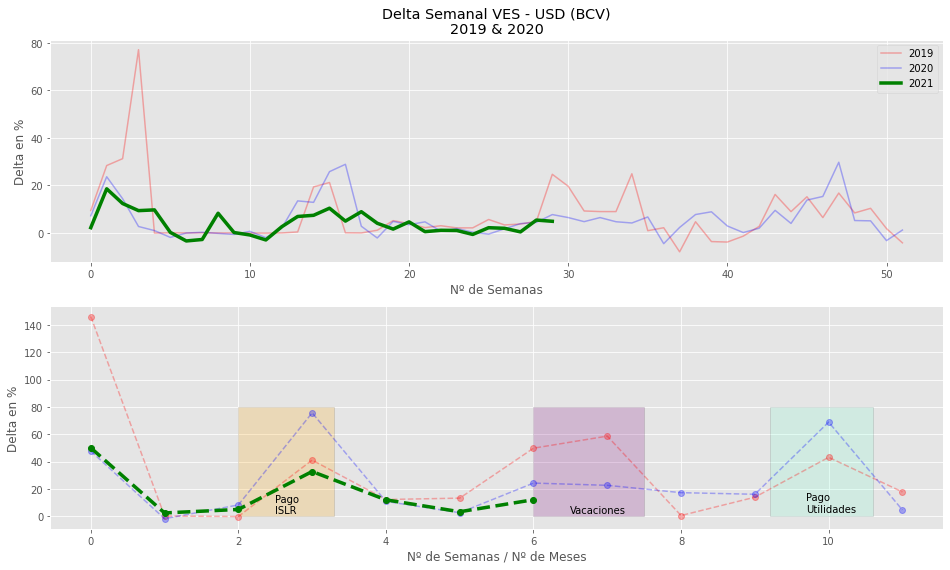

In [10]:
# Ploteamos las curvas delta banco central años 2019 y 2020
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (16, 9))

# Semanas
ax[0].set_title('Delta Semanal VES - USD (BCV)\n2019 & 2020')
ax[0].plot(semanas_bcv['2019'].values, 'r', label = '2019', alpha = 0.3)
ax[0].plot(semanas_bcv['2020'].values, 'b', label = '2020', alpha = 0.3)
ax[0].plot(semanas_bcv['2021'].values, 'g', label = '2021', linewidth = 3.5)
ax[0].legend(loc = 'upper right')
ax[0].set_xlabel('Nº de Semanas')
ax[0].set_ylabel('Delta en %')

# Zonas de interes

islr = (2,0)
vac = (6,0)
util = (9.2,0)

ax[1].add_patch(matplotlib.patches.Rectangle(islr, width = 1.3, height = 80, edgecolor = 'black', facecolor = 'orange', alpha = 0.2))
ax[1].text(islr[0] + 0.5, 2, "Pago\nISLR")
ax[1].add_patch(matplotlib.patches.Rectangle(vac, width = 1.5, height = 80, edgecolor = 'black', facecolor = 'purple', alpha = 0.2))
ax[1].text(vac[0] + 0.5, 2, "Vacaciones")
ax[1].add_patch(matplotlib.patches.Rectangle(util, width = 1.4, height = 80, edgecolor = 'black', facecolor = 'aquamarine', alpha = 0.2))
ax[1].text(util[0] + 0.5, 3, "Pago\nUtilidades")

# Meses
ax[1].plot(meses_bcv['2019'].values, 'r--o', label = 'Enero 2019', alpha = 0.3)
ax[1].plot(meses_bcv['2020'].values, 'b--o', label = 'Enero 2020', alpha = 0.3)
ax[1].plot(meses_bcv['2021'].values, 'g--o', label = 'Enero 2021', linewidth = 3.5)
ax[1].set_xlabel('Nº de Semanas / Nº de Meses')
ax[1].set_ylabel('Delta en %')


Se puede observar unas tendencias estacionales en el comportamiento del tipo de cambió, para los meses Febrero-Marzo **ISLR**, meses previos a las **Vacaciones** Junio-Julio y finalmente los pagos de **Utilidades** de los meses Octubre-Noviembre. 

In [11]:
# Gráfico interactivo
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

df_plot_m = ves_usd['2018-01-01':'2022-01-22'].resample('M').sum()
df_plot_s = ves_usd['2018-01-01':'2022-01-22'].resample('W').sum()

fig = make_subplots(rows = 2, cols = 1, subplot_titles=('Delta BCV Semanal', 'Delta BCV Mensual'))

fig.add_trace(go.Scatter(y = df_plot_s['2019']['Delta BCV'].values, mode = 'lines+markers', name = '2019'),
              row = 1, col = 1)
fig.add_trace(go.Scatter(y = df_plot_s['2020']['Delta BCV'].values, mode = 'lines+markers', name = '2020'),
              row = 1, col = 1)
fig.add_trace(go.Scatter(y = df_plot_s['2021']['Delta BCV'].values, mode = 'lines+markers', name = '2021'),
              row = 1, col = 1)

fig.add_trace(go.Scatter(y = df_plot_m['2019']['Delta BCV'].values, mode = 'lines+markers'),
              row = 2, col = 1)
fig.add_trace(go.Scatter(y = df_plot_m['2020']['Delta BCV'].values, mode = 'lines+markers'),
              row = 2, col = 1)
fig.add_trace(go.Scatter(y = df_plot_m['2021']['Delta BCV'].values, mode = 'lines+markers'),
              row = 2, col = 1)


<ipython-input-11-6fa100d9e9a8>:11: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

<ipython-input-11-6fa100d9e9a8>:13: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

<ipython-input-11-6fa100d9e9a8>:15: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

<ipython-input-11-6fa100d9e9a8>:18: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instea

### 4.2 Analisis VES - USD (Monitor)
Realizamos un cálculo similar con el USD de @enparalelovzla, esta vez desde el año 2018 hasta el año 2020

In [12]:
meses_monitor = ves_usd['Delta Monitor'].resample('M').sum()
semanas_monitor = ves_usd['Delta Monitor'].resample('W').sum()

Text(0, 0.5, 'Delta en %')

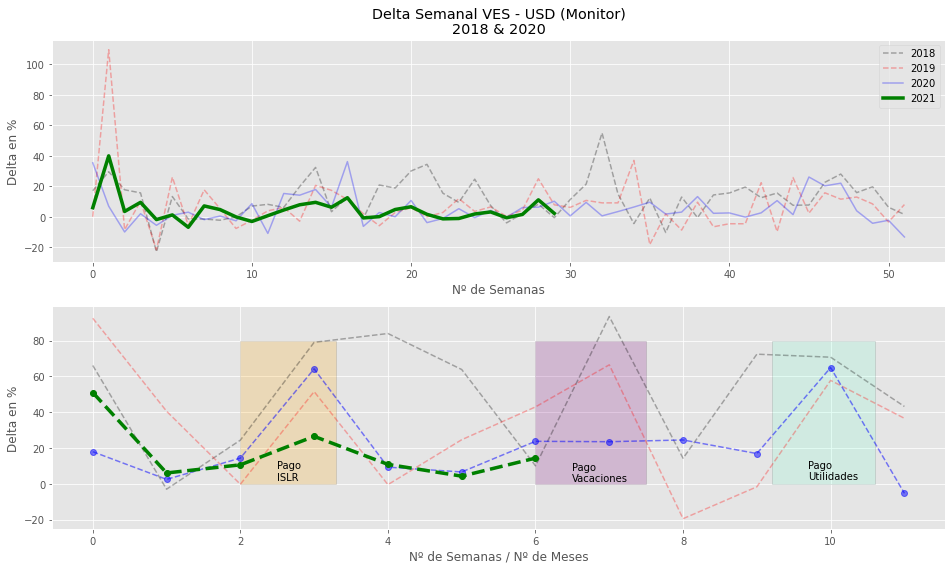

In [13]:
# Plot de graficos Delta Medio Mensual VES - USD en @enparalelovzla
# Ploteamos las curvas delta banco central años 2019 y 2020
fig, ax = plt.subplots(figsize = (16, 9), nrows = 2, ncols = 1)

# Semanas
ax[0].set_title('Delta Semanal VES - USD (Monitor)\n2018 & 2020')
ax[0].plot(semanas_monitor['2018'].values, 'k--', label = '2018', alpha = 0.3)
ax[0].plot(semanas_monitor['2019'].values, 'r--', label = '2019', alpha = 0.3)
ax[0].plot(semanas_monitor['2020'].values, 'b', label = '2020', alpha = 0.3, linewidth = 1.5)
ax[0].plot(semanas_monitor['2021'].values, 'g', label = '2021', linewidth = 3.5)
ax[0].legend(loc = 'upper right')
ax[0].set_xlabel('Nº de Semanas')
ax[0].set_ylabel('Delta en %')

# Zonas de interes
islr = (2,0)
vac = (6,0)
util = (9.2,0)

ax[1].add_patch(matplotlib.patches.Rectangle(islr, width = 1.3, height = 80, edgecolor = 'black', facecolor = 'orange', alpha = 0.2))
ax[1].text(islr[0] + 0.5, 2.2 , "Pago\nISLR")
ax[1].add_patch(matplotlib.patches.Rectangle(vac, width = 1.5, height = 80, edgecolor = 'black', facecolor = 'purple', alpha = 0.2))
ax[1].text(vac[0] + 0.5, 1.4, "Pago\nVacaciones")
ax[1].add_patch(matplotlib.patches.Rectangle(util, width = 1.4, height = 80, edgecolor = 'black', facecolor = 'aquamarine', alpha = 0.2))
ax[1].text(util[0] + 0.5, 2.5, "Pago\nUtilidades")

# Meses
ax[1].plot(meses_monitor['2018'].values, 'k--', label = 'Enero 2018', alpha = 0.3)
ax[1].plot(meses_monitor['2019'].values, 'r--', label = 'Enero 2019', alpha = 0.3)
ax[1].plot(meses_monitor['2020'].values, 'b--o', label = 'Enero 2020', alpha = 0.5, linewidth = 1.5)
ax[1].plot(meses_monitor['2021'].values, 'g--o', label = 'Enero 2021', linewidth = 3.5)
ax[1].set_xlabel('Nº de Semanas / Nº de Meses')
ax[1].set_ylabel('Delta en %')

El comportamiento parecido, sin embargo su volatidad es mayor ya que el tipo de cambio paralelo suele tener una varianza mayor en sus cotizaciones interdiarias. De igual forma, las zonas de interes **ISLR, Vacaciones y Utilidades** siguen ofreciendo comportamientos estacionales.

### 4.3 Tipo de Cambio VES - USD / BCV vs Monitor

El comportamiento de los dos tipos de cambio son similiares aunque con ciertas difernecias en la volatidad, graficamos para tener una mejor observación.

<ipython-input-14-1da7b697517a>:8: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

C:\Users\jose_\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

<ipython-input-14-1da7b697517a>:9: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

C:\Users\jose_\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt

Text(0.5, 1.0, '2020')

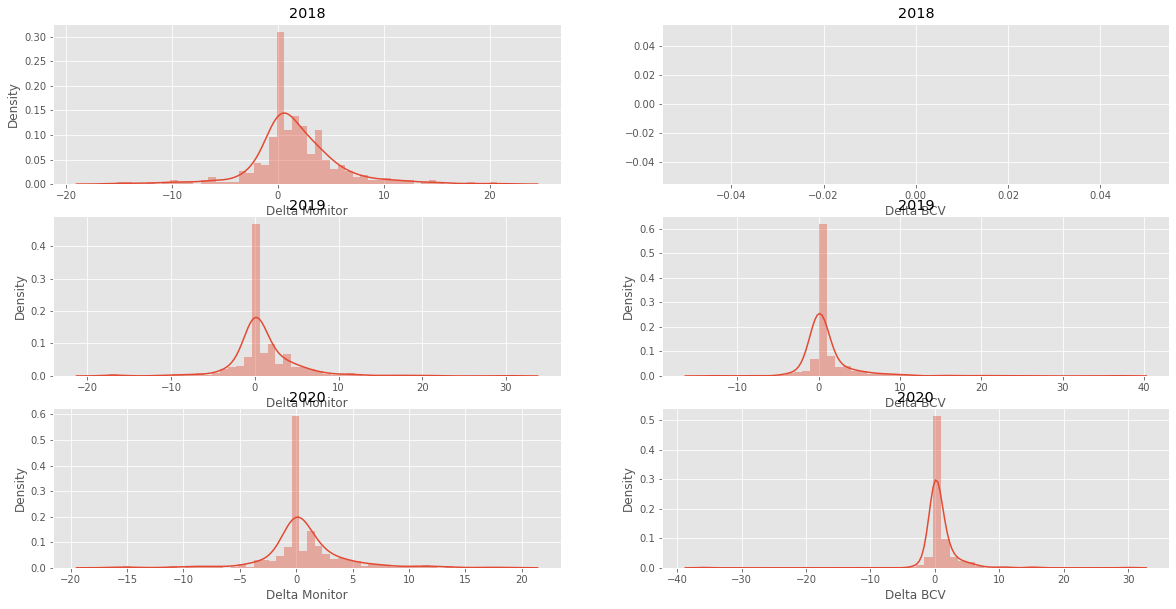

In [14]:
# Graficación de la distribución Normal de los DELTAS
import plotly.figure_factory as ff

fig, ax = plt.subplots(nrows = 3, ncols = 2)
fig.set_size_inches(20,10)

# Delta Diarios
sns.distplot(ves_usd['2018']['Delta Monitor'], ax = ax[0,0], bins = 50, norm_hist = True)
sns.distplot(ves_usd['2019']['Delta Monitor'], ax = ax[1,0], bins = 50, norm_hist = True)
sns.distplot(ves_usd['2020']['Delta Monitor'], ax = ax[2,0], bins = 50, norm_hist = True)

sns.distplot(ves_usd['2018']['Delta BCV'], ax = ax[0,1], bins = 50, norm_hist = True)
sns.distplot(ves_usd['2019']['Delta BCV'], ax = ax[1,1], bins = 50, norm_hist = True)
sns.distplot(ves_usd['2020']['Delta BCV'], ax = ax[2,1], bins = 50, norm_hist = True)

# Deltas Semanales
#sns.distplot(semanas_monitor['2018'], ax = ax[0,0], bins = 50, norm_hist = True)
#sns.distplot(semanas_monitor['2019'], ax = ax[1,0], bins = 50, norm_hist = True)
#sns.distplot(semanas_monitor['2020'], ax = ax[2,0], bins = 50, norm_hist = True)

#sns.distplot(semanas_bcv['2018'], ax = ax[0,1], bins = 50, norm_hist = True)
#sns.distplot(semanas_bcv['2019'], ax = ax[1,1], bins = 50, norm_hist = True)
#sns.distplot(semanas_bcv['2020'], ax = ax[2,1], bins = 50, norm_hist = True)

ax[0,0].set_title("2018")
ax[1,0].set_title("2019")
ax[2,0].set_title("2020")
ax[0,1].set_title("2018")
ax[1,1].set_title("2019")
ax[2,1].set_title("2020")

Claramente los datos presentan un comportamiento normal con medias desplazadas a la derecha de la curva en todos los casos.

Los diferenciales diarios de Monitor con respecto al Banco Central de Venezuela presentan una mayor dispersión en la curva normal y por tanto podemos inferir que las medidas de dispersión presentan cifras mayores.

El año 2020 presentan una dispersión y varianza mayor que años previos, su comportamiento es homogeneamente disperso.

Podemos inferir que el comportamiento diferencial del Banco Central de Venezuela es mayormente conservador a diferencia del mercado paralelo.

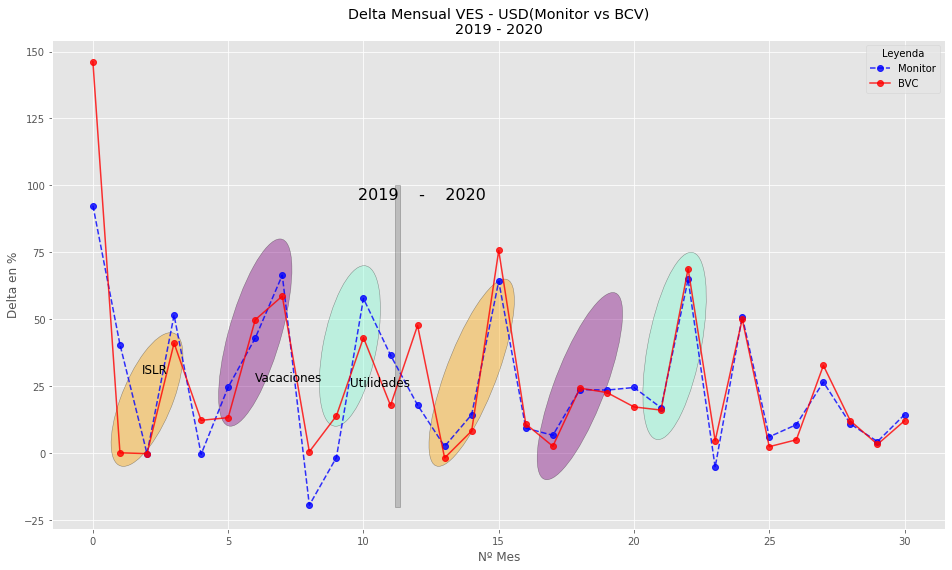

In [15]:
# Creación de Subplots
fig, ax = plt.subplots(figsize = (16, 9), nrows = 1, ncols = 1)

islr = 2
aginaldos = 11

# Plot Banco Central y Monitor
ax.plot(meses_monitor['2019':'2021'].values, 'b--o', label = 'Monitor', alpha = 0.8)
ax.plot(meses_bcv['2019':'2021'].values, 'r-o', label = 'BVC', alpha = 0.8)
ax.add_patch(matplotlib.patches.Rectangle((11.15,-20), 0.2, 120, edgecolor = 'black', facecolor = 'grey', alpha = 0.4))
ax.text(x = 9.8, y = 95, s = '2019    -    2020', fontsize = 16)

# Zonas de Interes
islr = (2,20)
vac = (6,45)
util = (9.5,40)

ax.add_patch(matplotlib.patches.Ellipse(islr, 2, 50, edgecolor = 'black', facecolor = 'orange', alpha = 0.4, angle = -2))
ax.text(islr[0] - 0.2, 30, 'ISLR', fontsize = 12)
ax.add_patch(matplotlib.patches.Ellipse((islr[0] + 12, islr[1] + 10), 2, 70, edgecolor = 'black', facecolor = 'orange', alpha = 0.4 , angle = -2))

ax.add_patch(matplotlib.patches.Ellipse(vac, 2, 70, edgecolor = 'black', facecolor = 'purple', alpha = 0.4 , angle = -1.5))
ax.text(vac[0], 27, 'Vacaciones', fontsize = 12)
ax.add_patch(matplotlib.patches.Ellipse((vac[0]+ 12, vac[1] - 20), 2, 70, edgecolor = 'black', facecolor = 'purple', alpha = 0.4 , angle = -2))

ax.add_patch(matplotlib.patches.Ellipse(util, 2, 60, edgecolor = 'black', facecolor = 'aquamarine', alpha = 0.4 , angle = -1))
ax.text(util[0], 25, 'Utilidades', fontsize = 12)
ax.add_patch(matplotlib.patches.Ellipse((util[0]+ 12, util[1]), 2, 70, edgecolor = 'black', facecolor = 'aquamarine', alpha = 0.4 , angle = -1))

# Leyendas
plt.xlabel('Nº Mes')
plt.ylabel('Delta en %')
plt.title('Delta Mensual VES - USD(Monitor vs BCV)\n2019 - 2020')
plt.legend(loc = 'upper right', title = 'Leyenda')

### 4.4 Correlación Devaluación Vs Inflación

Determinamos la correlación de el ritmo de inflación mensual con la devaluación monetaria marcada tanto por BCV como el mercado paralelo.

#### 4.4.1 Carga de Datos de Inflación.

Cargamos los datos desde un archivo 'cvs' donde de igual forma disponemos de la librería PANDAS para realizar la carga.

In [16]:
# Carga de fichero csv.
# Directorio del fichero
url = 'https://raw.githubusercontent.com/Chrissroman/analisis_monetario_ves_usd/A1/inflacion_venezuela.csv'
df_csv = pd.read_csv(url, delimiter= ',', decimal= '.')
df_csv.head()

year  mounth  inflation  acum_inflation
0  2017       1       18.7            18.7
1  2017       2       20.6            42.4
2  2017       3       16.2            65.5
3  2017       4       16.5            92.8
4  2017       5       18.2           127.9

In [17]:
# Se organiza el index nuevamente para que sea reconocido cómo DateTime
df_csv['Date'] = (df_csv['year'].astype('string')) + ' / ' + df_csv['mounth'].astype('string')
df_csv['Date'] = pd.to_datetime(df_csv['Date'])
df_csv.index = df_csv['Date']
df_csv.drop(['year', 'mounth', 'Date'], axis=1, inplace=True)
df_csv.head()

inflation  acum_inflation
Date                                 
2017-01-01       18.7            18.7
2017-02-01       20.6            42.4
2017-03-01       16.2            65.5
2017-04-01       16.5            92.8
2017-05-01       18.2           127.9

#### 4.4.2 Análisis Gráfico de la Inflación 
Graficamos los años 2018, 2019 y 2020. El año 2018 resulto tener mayor volatidad sobre la inflación a diferencia de los años posteriores.

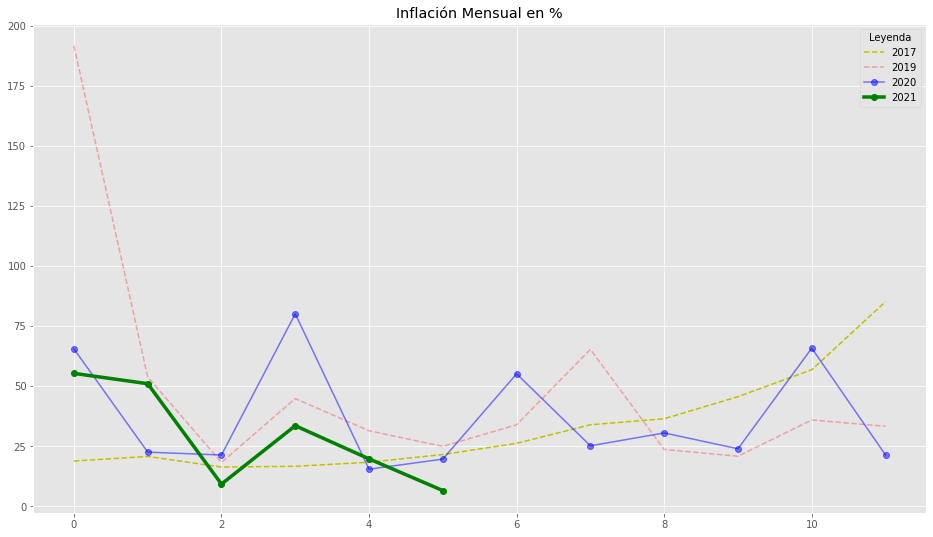

In [18]:
# Graficamos cada año
df_inf_men = df_csv['inflation'].resample('M').sum()
df_inf_acum = df_csv['acum_inflation'].resample('M').sum()

# Inflación mensual
fig, ax = plt.subplots(figsize = (16,9))

ax.plot(df_inf_men['2017'].values, 'y--', label = '2017', alpha = 1, linewidth = 1.5)
#ax.plot(df_inf_men['2018'].values, 'k--', label = '2018', alpha = 0.3)
ax.plot(df_inf_men['2019'].values, 'r--', label = '2019', alpha = 0.3)
ax.plot(df_inf_men['2020'].values, 'b-o', label = '2020', alpha = 0.5)
ax.plot(df_inf_men['2021'].values, 'g-o', label = '2021', linewidth = 3.5)
plt.title("Inflación Mensual en %")
plt.legend(loc = 'upper right', title = 'Leyenda')

La inflación del año 2018 resulta ser muy superior a su año anterior y posteriores, por tanto graficamos su comportamiento en una grafica separada.

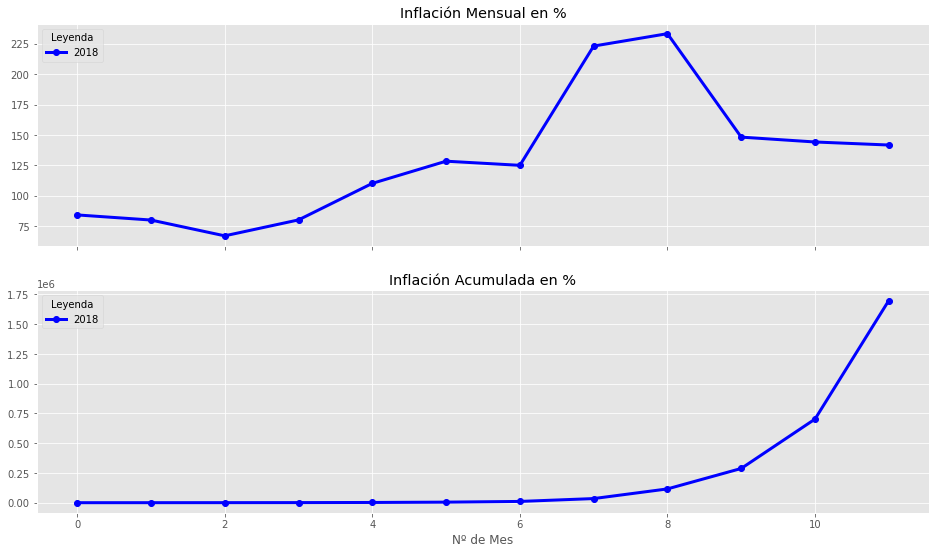

In [19]:
# Graficar año 2018

fig, ax = plt.subplots(figsize = (16,9), nrows = 2, ncols = 1, sharex = True)

# Inflación Mensual
ax[0].plot(df_inf_men['2018'].values, 'b-o', label = '2018', alpha = 1, linewidth = 3)
ax[0].set_title("Inflación Mensual en %")
ax[0].legend(loc = 'upper left', title = 'Leyenda')

# Inflación Acumulada
ax[1].plot(df_inf_acum['2018'].values, 'b-o', label = '2018', alpha = 1, linewidth = 3)
ax[1].set_title("Inflación Acumulada en %")
ax[1].set_xlabel('Nº de Mes')
ax[1].legend(loc = 'upper left', title = 'Leyenda')

A diferencia de los años 2017, 2019 y 2020, la aceleración de la inflación desde el mes de agosto es pronunciada para el año 2020. La inflación mensual de los años posteriores muestra un comportamiento medianamente estable, donde aunque su crecimeinto es alto, este resulta ser constante.

#### 4.4.3 Correlación Devaluación Monetaria vs Inflación

Aprovechamos la oportunidad de estudiar una posible correlación en la devaluación del VES con respecto a USD y su impacto en la inflación, la misma medida en terminos de IPC (Indice de Precios al Consumidor).

In [20]:
# Vector de valores para la inflación
inf_m = df_inf_men['2018':'2021'].append(pd.Series([np.nan]), ignore_index = True)
inf_a = df_inf_acum['2018':'2021'].append(pd.Series([np.nan]), ignore_index = True)

In [21]:
# Construcción del Data Frame con los diferenciales monetarios, inflación mensual y su acumulada.
df = pd.DataFrame(index = meses_bcv.index.values)
df['Delta BCV'], df['Delta Monitor'], df['Inflación'], df['Inflación Acumulada'] = meses_bcv.values, meses_monitor.values, inf_m.values, inf_a.values

In [22]:
# Correción de valores para terminos de tanto es a 1
cols = df.columns.to_list()

for col in cols:
  df[col] = df[col].apply(lambda x: x/100)

Se arma la tabla de correlación con el método de R2 de Pearson

In [23]:
# Tabla de correlaciones entre campos.
df_corr = df.corr(method= 'pearson')
df_corr

Delta BCV  Delta Monitor  Inflación  Inflación Acumulada
Delta BCV             1.000000       0.407201   0.105140            -0.159854
Delta Monitor         0.407201       1.000000   0.592075             0.157622
Inflación             0.105140       0.592075   1.000000             0.348445
Inflación Acumulada  -0.159854       0.157622   0.348445             1.000000

Podemos encontrar una correlación moderadamente fuerte entre los diferenciales de devaluación del tipo de cambio paralelo (monitor) con la inflación mensual, no así con los valores del tipo de cambio del Banco Central. Esto puede ser debido a su poca tendencia a una alta volatidad en su tipo de cambio. 

Esto puede ser indicio claro de un anclaje entre la inflación y el tipo de cambio del mercado paralelo y no al organismo oficial del Banco Central. Sin lugar a dudas una conclusión interesante.  

Grafiquemos un mapa de calor para poder observar este comportamiento con mejor intuición.

<AxesSubplot:>

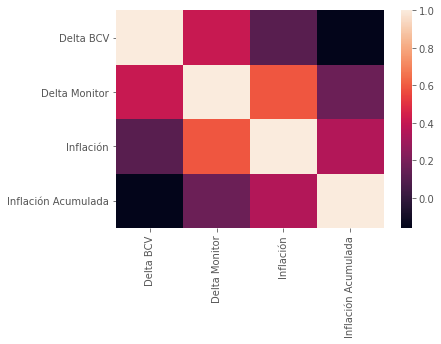

In [24]:
# Graficamos el mapa de calor con la paquetería Seaborn
sns.heatmap(df_corr, xticklabels = df_corr.columns.to_list(), yticklabels = df_corr.columns.to_list())

## 5. Modelos de Predicción VES - USD

Con el fin de crear un modelo que prediga con cierto margen de error la devaluación monetaria venezolana en el año 2021, se propondrá varios modelos predictivos. 

Empezando por un cálculo sencillo, estimando valores en función de años posteriores.

Se planteará tres escenarios:

* **Optimista**
* **Conservador**
* **Pesimista**

### 5.1 Predicción por Medias

Se construye un modelo de predicción mediante las medias metricas de los años anteriores, se hará una multiplicación por un escalar que nos permita dibujar curvas **Optimistas** y **Pesimistas**.

Al ser el tipo de cambio paralelo el valor que mas correlación tiene con las cifras de inflación, será con este que se contruya el modelo.

In [25]:
from datetime import timedelta
from dateutil.relativedelta import relativedelta

In [26]:
# Construcción mediante medias de los años 2019 y 2020
pred = np.zeros((13, 3), dtype = 'float')
cols = ['Delta Conservadora', 'Delta Optimista', 'Delta Pesimista']
escalar = [1, 0.7, 1.20]

fechas = df['2020-07' : '2021-07'].index.to_list()
for i in range(0, len(fechas)):
  fechas[i] = fechas[i] + relativedelta(years = 1)

values = ((df['Delta Monitor'].loc['2019-7' : '2020-7'].values + df['Delta Monitor'].loc['2020-7' : '2021-7'].values) / 2) * 100
#values = np.append(values, values[0], axis = None)

for col in range(0, len(escalar)):
  for i in range(0, len(values)):
    pred[i, col] = values[i] * escalar[col]

df_predict_1 = pd.DataFrame(pred, index = fechas, columns = cols)

In [27]:
df_predict_1.head()

Delta Conservadora  Delta Optimista  Delta Pesimista
2021-07-31           33.341227        23.338859        40.009473
2021-08-31           44.977818        31.484472        53.973381
2021-09-30            2.502900         1.752030         3.003481
2021-10-31            7.609143         5.326400         9.130972
2021-11-30           61.328428        42.929899        73.594113

In [28]:
# Cálculo de VES en proyección a lo largo del 2021 
values = np.zeros((13 , 3), dtype = 'float')
cols = df_predict_1.columns.to_list()

last_value = ves_usd['Monitor'].resample('M').mean()
lv = last_value['2021-07-31']

j = 0
for col in cols:
  
  for i in range(0, len(values)):
    if i ==0:
      values[i, j] = lv
    else:
      values[i, j] = ((df_predict_1[col][i]/100) + 1) * values[i - 1, j] 
  j += 1

df_predict_2 = pd.DataFrame(values, index = fechas, columns = ['Conservadora', 'Optimista', 'Pesimista'])

In [29]:
# Proyección comparativa en deltas y VES futuros
print(df_predict_1, '\n' * 2, df_predict_2)

            Delta Conservadora  Delta Optimista  Delta Pesimista
2021-07-31           33.341227        23.338859        40.009473
2021-08-31           44.977818        31.484472        53.973381
2021-09-30            2.502900         1.752030         3.003481
2021-10-31            7.609143         5.326400         9.130972
2021-11-30           61.328428        42.929899        73.594113
2021-12-31           15.631308        10.941915        18.757569
2022-01-31           34.446416        24.112491        41.335699
2022-02-28            4.270490         2.989343         5.124588
2022-03-31           12.474088         8.731862        14.968906
2022-04-30           45.342346        31.739642        54.410815
2022-05-31           10.076396         7.053478        12.091676
2022-06-30            5.453377         3.817364         6.544052
2022-07-31           19.042589        13.329813        22.851107 

             Conservadora     Optimista     Pesimista
2021-07-31  3.400697e+06  3.400697

Text(11.2, 46957582.02407218, '46957582.02')

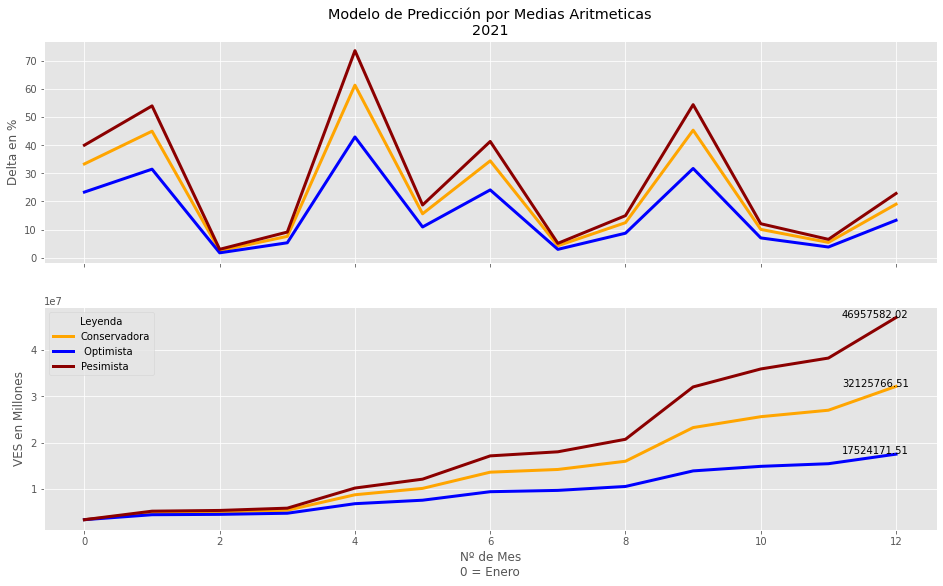

In [30]:
# Plot Banco Central y Monitor
fig, ax = plt.subplots(figsize = (16,9), nrows = 2, ncols = 1, sharex = True)

# Delta de Devaluación Mensual Predicha
ax[0].plot(df_predict_1['Delta Conservadora'].values, 'orange', label = 'Predict Conservador', linewidth = 3)
ax[0].plot(df_predict_1['Delta Optimista'].values, 'blue', label = 'Predict Optimista', linewidth = 3)
ax[0].plot(df_predict_1['Delta Pesimista'].values, 'darkred', label = 'Predict Pesimista', linewidth = 3)
ax[0].set_ylabel('Delta en %')
ax[0].set_title('Modelo de Predicción por Medias Aritmeticas\n2021')

plt.plot

# Devaluación en los tres escenarios
ax[1].plot(df_predict_2['Conservadora'].values, 'orange', label = 'Conservadora', linewidth = 3)
ax[1].plot(df_predict_2['Optimista'].values, 'blue', label = ' Optimista', linewidth = 3)
ax[1].plot(df_predict_2['Pesimista'].values, 'darkred', label = 'Pesimista', linewidth = 3)
ax[1].legend(loc = 'upper left', title = 'Leyenda')
ax[1].set_ylabel('VES en Millones')
ax[1].set_xlabel('Nº de Mes\n0 = Enero')

# Etiquetas
ax[1].text(x = 11.2, y = df_predict_2['Conservadora']['2022-07-31'], s = round(df_predict_2['Conservadora']['2022-07-31'], 2), fontsize = 10)
ax[1].text(x = 11.2, y = df_predict_2['Optimista']['2022-07-31'], s = round(df_predict_2['Optimista']['2022-07-31'], 2), fontsize = 10)
ax[1].text(x = 11.2, y = df_predict_2['Pesimista']['2022-07-31'], s = round(df_predict_2['Pesimista']['2022-07-31'], 2), fontsize = 10)



Se ha tomado en cuenta un crecimiento **Pesimista** del 30% y **Optimista** del -20$ con respecto al valor **Conservador**

In [31]:
# DataFrame final con la proyección y sus deltas
df_finale = pd.concat([df_predict_1, df_predict_2], axis = 1, ignore_index = False)
df_finale

Delta Conservadora  Delta Optimista  Delta Pesimista  \
2021-07-31           33.341227        23.338859        40.009473   
2021-08-31           44.977818        31.484472        53.973381   
2021-09-30            2.502900         1.752030         3.003481   
2021-10-31            7.609143         5.326400         9.130972   
2021-11-30           61.328428        42.929899        73.594113   
2021-12-31           15.631308        10.941915        18.757569   
2022-01-31           34.446416        24.112491        41.335699   
2022-02-28            4.270490         2.989343         5.124588   
2022-03-31           12.474088         8.731862        14.968906   
2022-04-30           45.342346        31.739642        54.410815   
2022-05-31           10.076396         7.053478        12.091676   
2022-06-30            5.453377         3.817364         6.544052   
2022-07-31           19.042589        13.329813        22.851107   

            Conservadora     Optimista     Pesimista  
2021-07-31  3.400697e+06  3.400697e+06  3.400697e+06  
2021-08-31  4.930256e+06  4.471388e+06  5.236168e+06  
2021-09-30  5.053656e+06  4.549728e+06  5.393435e+06  
2021-10-31  5.438195e+06  4.792065e+06  5.885908e+06  
2021-11-30  8.773355e+06  6.849294e+06  1.021759e+07  
2021-12-31  1.014475e+07  7.598738e+06  1.213416e+07  
2022-01-31  1.363925e+07  9.430983e+06  1.714990e+07  
2022-02-28  1.422171e+07  9.712907e+06  1.802876e+07  
2022-03-31  1.599574e+07  1.056102e+07  2.072747e+07  
2022-04-30  2.324858e+07  1.391306e+07  3.200546e+07  
2022-05-31  2.559120e+07  1.489441e+07  3.587546e+07  
2022-06-30  2.698678e+07  1.546298e+07  3.822317e+07  
2022-07-31  3.212577e+07  1.752417e+07  4.695758e+07

In [32]:
last_value['2021']

Fecha
2021-01-31    1.559031e+06
2021-02-28    1.785237e+06
2021-03-31    1.882099e+06
2021-04-30    2.452396e+06
2021-05-31    2.964852e+06
2021-06-30    3.143539e+06
2021-07-31    3.400697e+06
Freq: M, Name: Monitor, dtype: float64

Retornamos un archivo xlsx para su manejo en futuras operaciones.

In [33]:
# Exportar xlsx
#last_value['2021'].to_excel('TC Monitor Promedio 2021.xlsx', sheet_name = 'TC 2021')
#df_finale.to_excel('Predicción Monetaria.xlsx', sheet_name='Predicción 2021')

### 5.2 Recursive Forecasting





## 6. MXN/USD

Usamos la API que ofrece investing para extraer los valores históricos del tipo de cambio entre el Peso Mexicano y el Dolar Estadounidense

In [34]:
mxn_usd = inpy.get_currency_cross_historical_data('USD/MXN', '01/01/2018', '20/07/2021')

In [35]:
mxn_usd

Open     High      Low    Close Currency
Date                                                   
2018-01-01  19.6575  19.6600  19.6575  19.6600      MXN
2018-01-02  19.6711  19.6735  19.4426  19.5413      MXN
2018-01-03  19.5370  19.5442  19.3290  19.3510      MXN
2018-01-04  19.3470  19.3867  19.2035  19.2895      MXN
2018-01-05  19.2935  19.4095  19.1690  19.1810      MXN
...             ...      ...      ...      ...      ...
2021-07-14  20.0605  20.0644  19.8561  19.8669      MXN
2021-07-15  19.8811  20.0009  19.8668  19.9350      MXN
2021-07-16  19.9455  19.9566  19.8245  19.8750      MXN
2021-07-19  19.9035  20.1020  19.8980  20.0710      MXN
2021-07-20  20.0805  20.1975  19.9995  20.1389      MXN

[927 rows x 5 columns]

In [36]:
# Resample por Semana
semanas_mxn_usd = mxn_usd.resample('W').mean()

<ipython-input-37-96965548d213>:6: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

<ipython-input-37-96965548d213>:7: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

<ipython-input-37-96965548d213>:8: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

<ipython-input-37-96965548d213>:9: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



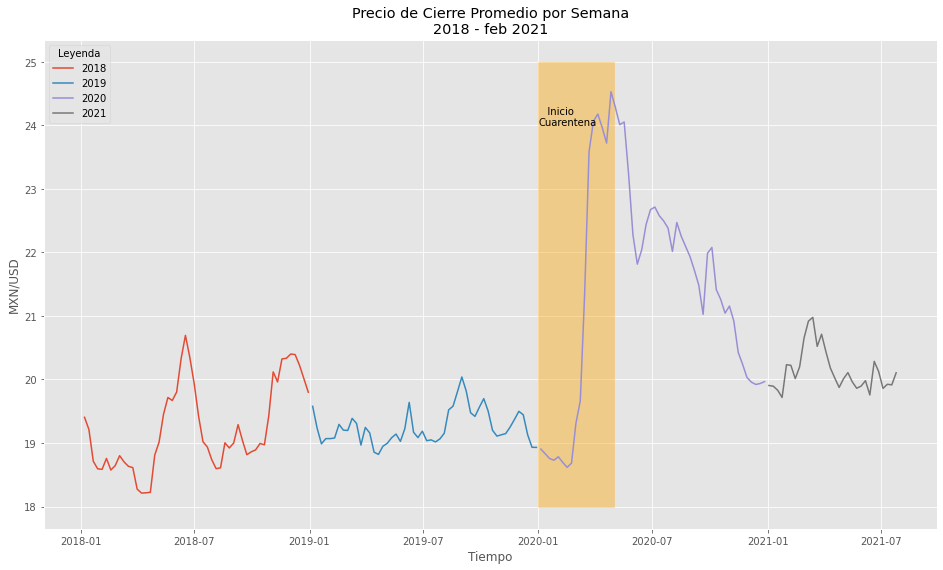

In [37]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize = (16,9), nrows = 1, ncols = 1)

# Plot
ax.plot(semanas_mxn_usd['2018']['Close'], label = '2018')
ax.plot(semanas_mxn_usd['2019']['Close'], label = '2019')
ax.plot(semanas_mxn_usd['2020']['Close'], label = '2020')
ax.plot(semanas_mxn_usd['2021']['Close'], label = '2021')

#covid
Q_start = mdates.date2num(datetime(year = 2020, month = 1, day = 1))
Q_end = mdates.date2num(datetime(year = 2020, month = 5, day = 1))

# Zona de interes
ax.add_patch(matplotlib.patches.Rectangle((Q_start, 18), width = (30 * 4), height = 7 , alpha = 0.4, color = 'orange'))
ax.text(Q_start, 24, s = '   Inicio\nCuarentena', fontsize = 10)

plt.title("Precio de Cierre Promedio por Semana\n2018 - feb 2021")
plt.xlabel("Tiempo")
plt.ylabel("MXN/USD")
plt.legend(title = 'Leyenda', loc = 'upper left')

En el mes de abril del 2020 iniciaron procedimientos de protección epidemiológica ante una coyuntura sanitara provocada por SARS-CORONAVIRUS-2. El cierre masivo de comercios y la paralización parcial o completa de diversos sectores, han provocado incertidumbre alrededor de un posible colapso económico generando presión sobre diversos activos. 

Dicha presión se debe a la huída del sector privado a activos de reserva con una mayor confianza, entre ellos, el Dolar Estadounidense (USD).

## 7. GBP/USD

In [38]:
gbp_usd = inpy.get_currency_cross_historical_data('GBP/USD', from_date = '01/01/2018', to_date = '20/07/2021')

In [39]:
gbp_usd.head()

Open    High     Low   Close Currency
Date                                               
2018-01-01  1.3515  1.3522  1.3494  1.3503      USD
2018-01-02  1.3507  1.3602  1.3500  1.3588      USD
2018-01-03  1.3588  1.3614  1.3497  1.3516      USD
2018-01-04  1.3515  1.3562  1.3505  1.3553      USD
2018-01-05  1.3552  1.3583  1.3523  1.3571      USD

In [40]:
# Resample por Semana
semanas_gbp_usd = gbp_usd.resample('W').mean()

<ipython-input-41-6b7df317414f>:4: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

<ipython-input-41-6b7df317414f>:5: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

<ipython-input-41-6b7df317414f>:6: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

<ipython-input-41-6b7df317414f>:7: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



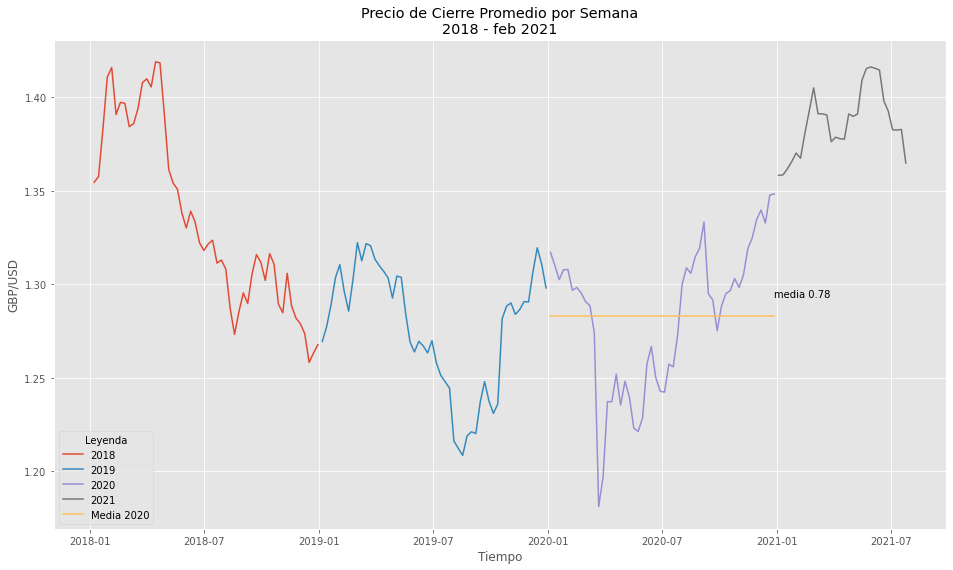

In [41]:
fig, ax = plt.subplots(figsize = (16,9), nrows = 1, ncols = 1)

# Plot
ax.plot(semanas_gbp_usd['2018']['Close'], label = '2018')
ax.plot(semanas_gbp_usd['2019']['Close'], label = '2019')
ax.plot(semanas_gbp_usd['2020']['Close'], label = '2020')
ax.plot(semanas_gbp_usd['2021']['Close'], label = '2021')

mean_2020 =  semanas_gbp_usd['2020']['Close'].mean()
y_mean = np.zeros((len(semanas_gbp_usd['2020'].index.to_list()), 1))

for i in range(0, len(y_mean)):
  y_mean[i] = mean_2020

gbp_mean_2020 = pd.DataFrame(y_mean, index = semanas_gbp_usd['2020'].index.to_list())

ax.plot(gbp_mean_2020, label = 'Media 2020')
ax.text(x = gbp_mean_2020.index[-1],  y = mean_2020 + 0.01, s = 'media 0.78')

#covid
Q_start = mdates.date2num(datetime(year = 2020, month = 4, day = 1))
Q_end = mdates.date2num(datetime(year = 2020, month = 5, day = 1))

plt.title("Precio de Cierre Promedio por Semana\n2018 - feb 2021")
plt.xlabel("Tiempo")
plt.ylabel("GBP/USD")
plt.legend(title = 'Leyenda', loc = 'best')

Después de iniciar el período de cuarentena en el Reino Unido, existe una clara subida instantanea del valor del tipo de cambio de la Libra Esterlina ante el Dolar Estadounidense seguida de una tendencia de revalorización de la moneda frente al Dolar.

A diferencia del peso mexicano, la libra es un activo de reserva por excelencia.Frente a la incertidumbre ha mermado la demanda de dolares, fenómeno provocado por una paralización de la actividad económica y por tanto un posible cese parcial de importaciones, principalmente en el sector indusrial. 

Otro factor motivante puede ser el efecto de debilitamiento de la moneda debido a la emisión monetaria. Otros pares monetarios como el EUR/USD parecen tener comportamientos similares.

# 7.EUR/USD

In [42]:
eur_usd = inpy.get_currency_cross_historical_data('EUR/USD', from_date = '01/01/2018', to_date = '20/07/2021')

In [43]:
# Resample por Semana
semanas_eur_usd = eur_usd.resample('M').mean()

<ipython-input-44-0ca2281ce7c6>:6: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

<ipython-input-44-0ca2281ce7c6>:7: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

<ipython-input-44-0ca2281ce7c6>:8: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

<ipython-input-44-0ca2281ce7c6>:9: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



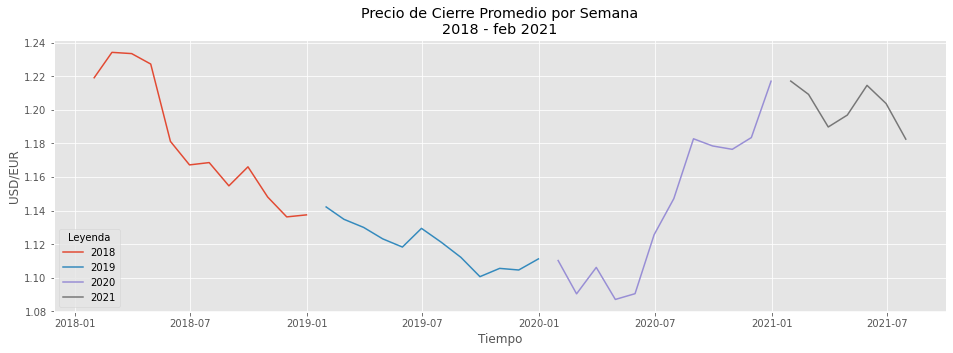

In [44]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (16,5), nrows = 1, ncols = 1)

# Plot
ax.plot(semanas_eur_usd['2018']['Close'], label = '2018')
ax.plot(semanas_eur_usd['2019']['Close'], label = '2019')
ax.plot(semanas_eur_usd['2020']['Close'], label = '2020')
ax.plot(semanas_eur_usd['2021']['Close'], label = '2021')

#covid
Q_start = mdates.date2num(datetime(year = 2020, month = 4, day = 1))
Q_end = mdates.date2num(datetime(year = 2020, month = 5, day = 1))

plt.title("Precio de Cierre Promedio por Semana\n2018 - feb 2021")
plt.xlabel("Tiempo")
plt.ylabel("USD/EUR")
plt.legend(title = 'Leyenda', loc = 'lower left')

Se puede apreciar una revalorización del Euro frente al Dolar Estadounidense, siendo un fenómeno parecido al que la libra esterlina frente al Dolar ha demostrado a lo largo del 2020. 